In [92]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [93]:
train = pd.read_csv('./titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
train.shape

(891, 12)

In [95]:
test = pd.read_csv('./titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [96]:
test.shape

(418, 11)

In [97]:
df = pd.concat([train.drop(columns=['Survived']), test]).sample(1309)

In [98]:
df.shape

(1309, 11)

In [99]:
df['Fare'] = df['Fare'].fillna(8.05)

In [100]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

<Axes: ylabel='Density'>

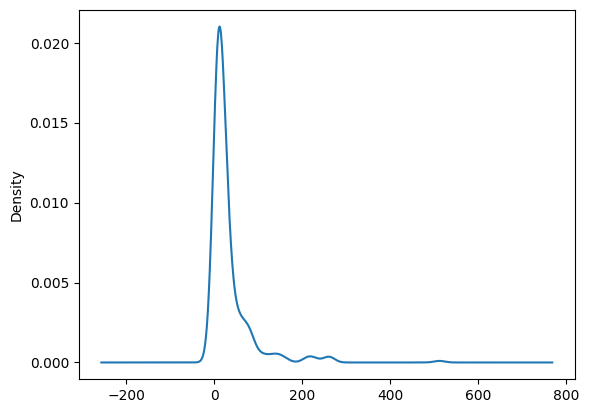

In [102]:
df['Fare'].plot(kind='kde')

In [121]:
# sample size = 50 -> 100 times
samples = []
for i in range(100):
    samples.append(df['Fare'].sample(50).values.tolist())

In [122]:
samples = np.array(samples)

In [123]:
samples

array([[ 13.    ,   7.05  ,  26.55  , ...,   8.6625,  21.    ,  13.    ],
       [221.7792,   7.55  ,  29.125 , ...,  26.    ,   7.225 ,  91.0792],
       [  7.7292,   7.925 ,   7.75  , ...,   7.75  ,   8.6625,  31.275 ],
       ...,
       [ 21.075 ,   8.05  ,  10.5   , ...,   7.925 ,  79.65  ,   7.8958],
       [  7.8292,  15.85  ,  31.275 , ...,   7.225 ,   7.775 ,   7.75  ],
       [ 29.7   ,  90.    ,  15.9   , ...,  24.15  ,  33.    ,  26.    ]])

In [124]:
samples_mean = samples.mean(axis=1)

In [125]:
samples_mean

array([29.903082, 35.835252, 38.316332, 32.389332, 37.158416, 50.102168,
       51.310922, 30.765166, 47.946418, 25.385076, 20.9445  , 25.800248,
       33.460416, 26.95075 , 23.741252, 31.929082, 31.805662, 27.475004,
       29.484498, 33.002414, 25.426248, 42.172666, 32.208422, 23.284084,
       32.516168, 33.117082, 23.607582, 30.949916, 24.733332, 33.140252,
       33.756662, 41.498252, 26.826752, 30.646166, 30.6265  , 51.65575 ,
       39.768252, 27.734168, 41.493002, 37.40508 , 32.470666, 35.887916,
       60.931998, 52.89675 , 40.72025 , 30.943836, 32.851498, 30.266832,
       41.163334, 38.756666, 31.212834, 21.202666, 23.731334, 34.645752,
       31.081   , 29.173248, 30.428082, 53.452748, 32.582916, 36.629336,
       43.8535  , 34.264416, 31.95925 , 34.911834, 35.919084, 25.77208 ,
       29.018662, 27.11517 , 23.417748, 26.38675 , 34.164916, 28.703914,
       39.442084, 28.443664, 28.786248, 31.044414, 38.55741 , 25.834584,
       35.007082, 21.464666, 26.603328, 26.073502, 

<Axes: ylabel='Density'>

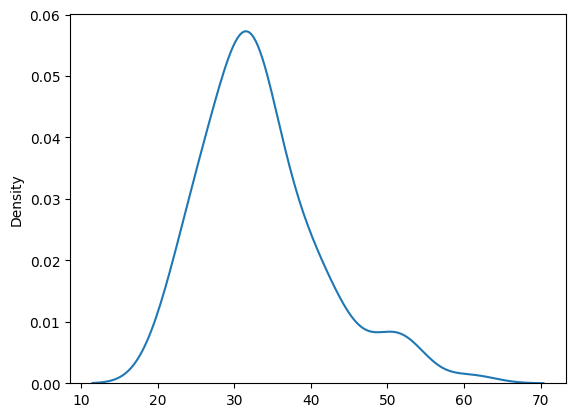

In [126]:
sns.kdeplot(samples_mean)

In [127]:
samples_mean.mean()

33.49707044

In [130]:
samples_mean.std()/np.sqrt(50)

1.1136675474010822

In [132]:
lower_limit = samples_mean.mean() - 2 * (samples_mean.std()/np.sqrt(50))
upper_limit = samples_mean.mean() + 2 * (samples_mean.std()/np.sqrt(50))

In [136]:
print(f'The range is in between {np.round(lower_limit,2)} - {np.round(upper_limit,2)}')

The range is in between 31.27 - 35.72


In [137]:
df['Fare'].mean()

33.27619320091674